In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
dataset = pd.read_csv("C:/Users/user/Downloads/Raisin_Dataset.csv")
dataset

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [3]:
dataset.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

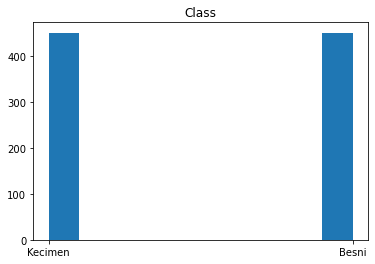

In [4]:
dataset.describe()
plt.hist(dataset['Class'])
plt.title('Class')
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
dataset["Class"]=encoder.fit_transform(dataset["Class"])

In [6]:
dataset

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


In [7]:
X = dataset.iloc[:,0:7].values
y = dataset.iloc[:,7].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [8]:
X

array([[8.75240000e+04, 4.42246011e+02, 2.53291155e+02, ...,
        9.05460000e+04, 7.58650579e-01, 1.18404000e+03],
       [7.51660000e+04, 4.06690687e+02, 2.43032436e+02, ...,
        7.87890000e+04, 6.84129570e-01, 1.12178600e+03],
       [9.08560000e+04, 4.42267048e+02, 2.66328318e+02, ...,
        9.37170000e+04, 6.37612812e-01, 1.20857500e+03],
       ...,
       [9.96570000e+04, 4.31706981e+02, 2.98837323e+02, ...,
        1.06264000e+05, 7.41098519e-01, 1.29282800e+03],
       [9.35230000e+04, 4.76344094e+02, 2.54176054e+02, ...,
        9.76530000e+04, 6.58798253e-01, 1.25854800e+03],
       [8.56090000e+04, 5.12081774e+02, 2.15271976e+02, ...,
        8.91970000e+04, 6.32019963e-01, 1.27286200e+03]])

In [9]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()
#softmax, tanh
model.add(Dense(32,input_shape=(7,),activation='relu'))
#model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
 
model.compile(Adam(lr=0.004), loss = 'binary_crossentropy',metrics=['accuracy'])
#categorical_crossentropy

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 818
Trainable params: 818
Non-trainable params: 0
_________________________________________________________________


C:\Users\user\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 1s 11ms/step - loss: 6588.8623 - accuracy: 0.5097 - val_loss: 1593.0264 - val_accuracy: 0.5111
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 693.8641 - accuracy: 0.4917 - val_loss: 322.9192 - val_accuracy: 0.5389
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 192.0645 - accuracy: 0.5250 - val_loss: 193.9147 - val_accuracy: 0.5389
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 185.3278 - accuracy: 0.5056 - val_loss: 192.8217 - val_accuracy: 0.4889
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 111.6867 - accuracy: 0.4889 - val_loss: 115.8190 - val_accuracy: 0.5444
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 90.9529 - accuracy: 0.5542 - val_loss: 107.4373 - val_accuracy: 0.5389
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 86.2633 - accuracy: 0.5264 - val_loss: 82.9054 - val_ac

Epoch 58/100
23/23 [==============================] - 0s 3ms/step - loss: 28.5544 - accuracy: 0.7097 - val_loss: 28.7741 - val_accuracy: 0.8778
Epoch 59/100
23/23 [==============================] - 0s 3ms/step - loss: 16.6499 - accuracy: 0.7903 - val_loss: 18.4385 - val_accuracy: 0.8278
Epoch 60/100
23/23 [==============================] - 0s 3ms/step - loss: 11.9573 - accuracy: 0.8250 - val_loss: 20.7910 - val_accuracy: 0.7944
Epoch 61/100
23/23 [==============================] - 0s 3ms/step - loss: 15.2343 - accuracy: 0.7833 - val_loss: 20.2970 - val_accuracy: 0.8222
Epoch 62/100
23/23 [==============================] - 0s 3ms/step - loss: 13.3349 - accuracy: 0.8097 - val_loss: 27.3394 - val_accuracy: 0.7111
Epoch 63/100
23/23 [==============================] - 0s 3ms/step - loss: 22.9235 - accuracy: 0.7667 - val_loss: 16.8220 - val_accuracy: 0.8556
Epoch 64/100
23/23 [==============================] - 0s 3ms/step - loss: 27.3082 - accuracy: 0.7944 - val_loss: 83.6009 - val_accuracy:

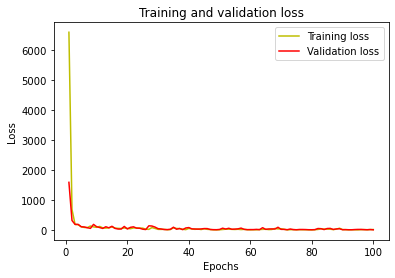

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

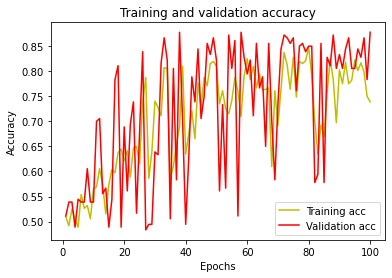

In [13]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        97
           1       0.83      0.93      0.87        83

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180

[[81 16]
 [ 6 77]]
